In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense

df = pd.read_csv('boston.csv')

In [14]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [15]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [16]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [17]:
x = df.loc[:,df.columns!='MEDV']
y = df.loc[:,df.columns=='MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
model = Sequential([
    Dense(128, input_shape=(13,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(x_train, y_train, epochs=100, validation_split=0.05, batch_size=4)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1792      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
84/84 [==============================] - 1s 4ms/step - loss: 366.9554 - val_loss: 135.5153
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 86.4951 - val_loss: 65.9189
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 56.58

In [19]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

5/5 [==============================] - 0s 3ms/step
Mean Squared Error: 9.73751543665373
Mean Absolute Error: 2.4446944970833626


In [20]:
y_pred = model.predict(x_test)
ps=[]
for i in y_pred:
    ps.append(list(i))

d = pd.DataFrame({'actual':y_test['MEDV'],'predicted':ps})
d

5/5 [==============================] - 0s 3ms/step


,actual,predicted
307,28.2,[31.010822]
343,23.9,[24.089771]
47,16.6,[19.299845]
67,22.0,[20.634861]
362,20.8,[21.841286]
...,...,...
467,19.1,[15.47618]
95,28.4,[27.274672]
122,20.5,[19.438705]
260,33.8,[35.16483]


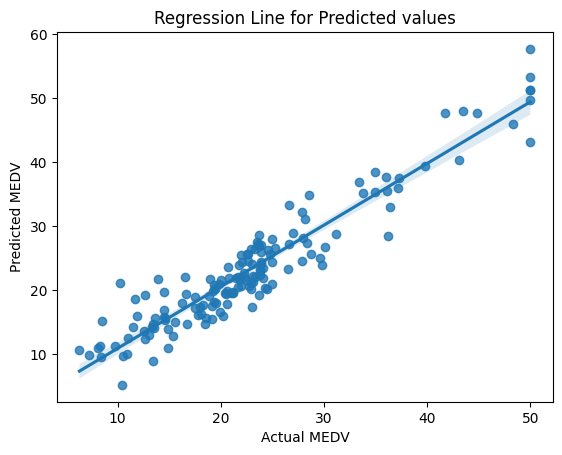

In [31]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.show()